### Regularization

In [1]:
import os
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model as linm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv('boston.csv')

X = data2.drop('MEDV', axis=1)
y = data2['MEDV']

In [3]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
data2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [5]:
tst_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tst_size)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

print('Train accuracy: {}'.format(regr.score(X_train, y_train)))
print('Test accuracy: {}'.format(regr.score(X_test, y_test)))

Train accuracy: 0.7457052435411016
Test accuracy: 0.7176188766468857


In [6]:
scaler = StandardScaler()

X_2 = scaler.fit_transform(X)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.3)

steps = [('poly', PolynomialFeatures(degree=2)), ('model', linm.LinearRegression())]

pipe = Pipeline(steps)

pipe.fit(X_2_train, y_2_train)

print('Train accuracy: {}'.format(pipe.score(X_2_train, y_2_train)))
print('Test accuracy: {}'.format(pipe.score(X_2_test, y_2_test)))

Train accuracy: 0.9492684102108317
Test accuracy: 0.8102861493776381


In [7]:
steps = [('poly', PolynomialFeatures(degree=2)),('model', linm.Ridge(alpha=10))]

pipe = Pipeline(steps)

pipe.fit(X_2_train, y_2_train)

print('Train accuracy: {}'.format(pipe.score(X_2_train, y_2_train)))
print('Test accuracy: {}'.format(pipe.score(X_2_test, y_2_test)))

Train accuracy: 0.9354883962681666
Test accuracy: 0.8151017547631425


In [8]:
x_ridge = np.linspace(0.001, 500, 1000)
y_ridge_train = []
y_ridge_test = []

for i in x_ridge: #range(x.size):
    steps = [('poly', PolynomialFeatures(degree=2)), ('model', linm.Ridge(alpha=i))]
    pipe = Pipeline(steps)
    pipe.fit(X_2_train, y_2_train)
    y_ridge_train.append(pipe.score(X_2_train, y_2_train))
    y_ridge_test.append(pipe.score(X_2_test, y_2_test))

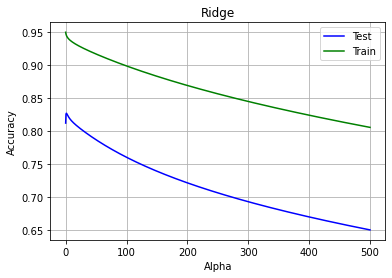

In [9]:
plt.plot(x_ridge, y_ridge_test, 'b', x_ridge, y_ridge_train, 'g')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Ridge')
plt.legend(['Test', 'Train'])
plt.grid()
plt.show()

In [10]:
x_lasso = np.linspace(0, 1, 1000)
max_lasso_test = 0

for i in x_lasso:
    steps = [('poly', PolynomialFeatures(degree=2)), ('model', linm.Lasso(alpha=i))]
    pipe = Pipeline(steps)
    pipe.fit(X_2_train, y_2_train)

    if max_lasso_test < pipe.score(X_2_test, y_2_test):
        max_lasso_test = pipe.score(X_2_test, y_2_test)
        optimal_alpha = i

steps = [('poly', PolynomialFeatures(degree=2)), ('model', linm.Lasso(alpha=optimal_alpha))]

pipe = Pipeline(steps)

pipe.fit(X_2_train, y_2_train)

print('Optimal alpha:', optimal_alpha)
print('Train accuracy: {}'.format(pipe.score(X_2_train, y_2_train)))
print('Test accuracy: {}'.format(pipe.score(X_2_test, y_2_test)))

c:\program files\python37\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 730.7847404308632, tolerance: 2.83324077346772
  positive)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.7309161073158, tolerance: 2.83324077346772
  positive)
c:\progra

Optimal alpha: 0.004004004004004004
Train accuracy: 0.9457272874629333
Test accuracy: 0.8323592493849602


In [11]:
y_lasso_train = []
y_lasso_test = []

for i in x_lasso: #range(x.size):
    steps = [('poly', PolynomialFeatures(degree=2)), ('model', linm.Lasso(alpha=i))]
    pipe = Pipeline(steps)
    pipe.fit(X_2_train, y_2_train)
    y_lasso_train.append(pipe.score(X_2_train, y_2_train))
    y_lasso_test.append(pipe.score(X_2_test, y_2_test))

c:\program files\python37\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 730.7847404308632, tolerance: 2.83324077346772
  positive)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.7309161073158, tolerance: 2.83324077346772
  positive)
c:\progra

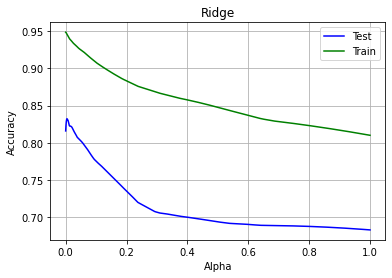

In [12]:
plt.plot(x_lasso, y_lasso_test, 'b', x_lasso, y_lasso_train, 'g')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Ridge')
plt.legend(['Test', 'Train'])
plt.grid()
plt.show()

### Regularization in linear regression

In [13]:
path = os.getcwd() + '/breast_cancer.txt'
names = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(path, header=None, names=names)

In [14]:
dataset['Class'].replace(2, 0, inplace=True)
dataset['Class'].replace(4, 1, inplace=True)

In [15]:
for name in names:
    dataset[name].fillna(dataset[name].mean(), inplace=True)

print(np.sum(dataset.isnull()))

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [16]:
X = dataset[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
y = dataset['Class']

X = np.array(X.values)
y = np.array(y.values)

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
regres = LogisticRegression(penalty='l1', C=1, solver='liblinear')
regres.fit(X_train, y_train)

print('Train accuracy: {}'.format(regres.score(X_train, y_train)))
print('Test accuracy: {}'.format(regres.score(X_test, y_test)))

Train accuracy: 0.9693251533742331
Test accuracy: 0.9619047619047619


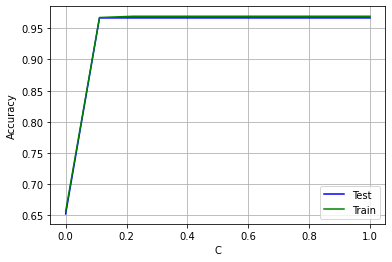

In [18]:
x_c = np.linspace(0.0001, 1, 10)
y_c_train = []
y_c_test = []

for c in x_c:
    logreg = LogisticRegression(penalty='l2', C=c)
    logreg.fit(X_train, y_train)

    y_c_test.append(logreg.score(X_test, y_test))
    y_c_train.append(logreg.score(X_train, y_train))

plt.plot(x_c, y_c_test, 'b', x_c, y_c_train, 'g')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Train'])
plt.grid()
plt.show()

#### Regularization of KNN

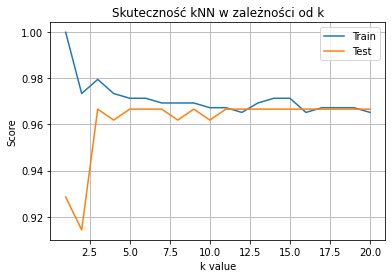

Optymalna wartość k:  3
Zbiór treningowy : 0.9795501022494888
Zbiór testowy : 0.9666666666666667


In [19]:
path = os.getcwd() + '\\breast_cancer.txt'

dataset = pd.read_csv(path, header=None, names=names)

dataset['Class'].replace(2, 0, inplace=True)
dataset['Class'].replace(4, 1, inplace=True)

for col in dataset.columns:
    mean = dataset[col].describe()['mean']
    dataset[col].fillna(mean, inplace=True)

X = dataset[dataset.columns[1:-1]]
y = dataset[dataset.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neighbors = np.arange(1, 21)
test_score = []
train_score = []
max_score = 0
opt_n_val = 0
for i, n in enumerate(neighbors):
    kNN = KNeighborsClassifier(n_neighbors=n)
    kNN.fit(X_train, y_train)
    train_score.append(kNN.score(X_train, y_train))
    test_score.append(kNN.score(X_test, y_test))
    if max_score < test_score[i]:
        max_score = test_score[i]
        opt_n_val = n

plt.plot(neighbors, train_score, neighbors, test_score)
plt.grid(True)
plt.title('Skuteczność kNN w zależności od k')
plt.xlabel('k value')
plt.ylabel('Score')
plt.legend(['Train', 'Test'])
plt.show()

kNN = KNeighborsClassifier(n_neighbors=opt_n_val)
kNN.fit(X_train, y_train)
print('Optymalna wartość k: ', opt_n_val)
print('Zbiór treningowy :', kNN.score(X_train, y_train))
print('Zbiór testowy :', kNN.score(X_test, y_test))

#### Regularization of decision trees


In [20]:
path = os.getcwd() + '\\breast_cancer.txt'

dataset = pd.read_csv(path, header=None, names=names)

dataset['Class'].replace(2, 0, inplace=True)
dataset['Class'].replace(4, 1, inplace=True)

In [21]:
for col in dataset.columns:
    mean = dataset[col].describe()['mean']
    dataset[col].fillna(mean, inplace=True)

X = dataset[dataset.columns[1:-1]]
y = dataset[dataset.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
depth = np.arange(1, 30)
test_score = []
train_score = []
max_score = 0
optimal_depth = 0

for i, d in enumerate(depth):
    classifier = tree.DecisionTreeClassifier(max_depth=d)
    classifier.fit(X_train, y_train)
    train_score.append(classifier.score(X_train, y_train))
    test_score.append(classifier.score(X_test, y_test))
    if max_score < test_score[i]:
        max_score = test_score[i]
        optimal_depth = d

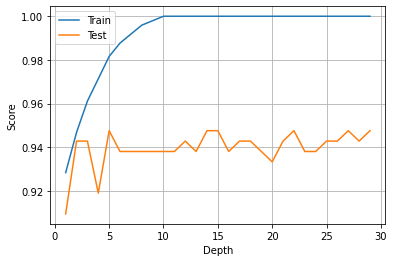

In [23]:
plt.plot(depth, train_score, depth, test_score)
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend(['Train', 'Test'])
plt.show()

In [24]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print('Optimal depth:', optimal_depth)
print('Train accuracy:', classifier.score(X_train, y_train))
print('Test accuracy:', classifier.score(X_test, y_test))

Optimal depth:  5
Train accuracy: 1.0
Test accuracy: 0.9476190476190476
